<a href="https://colab.research.google.com/github/Poorya0071/Image-classification/blob/main/Transfer%20Learning%20Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This notebook aims to study which transfer learning architecture works better for small image datasets. We study three different architectures and compare their accuracy of them.

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [3]:
train_dir = "/content/gdrive/MyDrive/Colab Notebooks/Agricultural-crops"

Walk through directories.

In [4]:
for roots, dirs , files in os.walk(train_dir):
  print(f"the root is : {roots[58:]} includes {len(dirs)} directories and {len(files)} images on it.")

the root is :  includes 30 directories and 0 images on it.
the root is : /maize includes 0 directories and 31 images on it.
the root is : /clove includes 0 directories and 30 images on it.
the root is : /Cherry includes 0 directories and 32 images on it.
the root is : /cotton includes 0 directories and 32 images on it.
the root is : /jowar includes 0 directories and 30 images on it.
the root is : /Cucumber includes 0 directories and 31 images on it.
the root is : /gram includes 0 directories and 25 images on it.
the root is : /almond includes 0 directories and 21 images on it.
the root is : /Coffee-plant includes 0 directories and 29 images on it.
the root is : /Pearl_millet(bajra) includes 0 directories and 39 images on it.
the root is : /papaya includes 0 directories and 23 images on it.
the root is : /sunflower includes 0 directories and 24 images on it.
the root is : /rice includes 0 directories and 29 images on it.
the root is : /tea includes 0 directories and 23 images on it.
the

In [5]:
calss_names = os.listdir(train_dir)

Use ImageDataGenerator to rescale and augment data.

In [6]:
Data_gen = ImageDataGenerator(rescale=1/255, rotation_range=20, shear_range=0.2,
                              zoom_range=0.2, width_shift_range=0.2,
                              height_shift_range=0.2, horizontal_flip=True,
                              validation_split = 0.1)

train_data = Data_gen.flow_from_directory(train_dir, class_mode='binary', shuffle=True,
                                        batch_size=32, target_size=(256,256), subset='training')
validation_data = Data_gen.flow_from_directory(train_dir, class_mode = 'binary', shuffle= True,
                                               batch_size = 32, target_size = (256,256), subset = 'validation')


Found 757 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


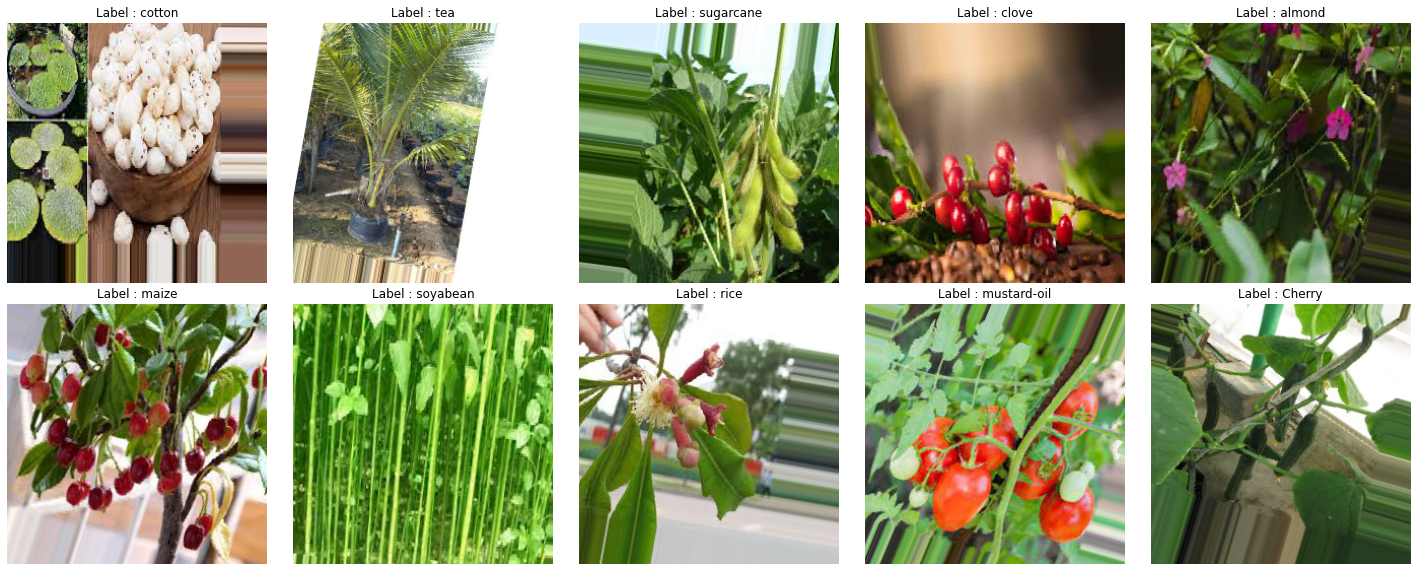

In [7]:
i=1
plt.figure(figsize=(20,8))
for images, labels in train_data:

    id = np.random.randint(len(images))
    image, label = images[id], labels[id]

    plt.subplot(2,5,i)
    plt.imshow(image)
    plt.title(f"Label : {calss_names[int(label)]}")
    plt.axis('off')

    i+=1
    if i>=11:
        break
plt.tight_layout()
plt.show()

First, upload efficientnet_B7, which is a deep and heavy model.

In [8]:
efficientnet_B7 = "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1"
import tensorflow_hub as hub
B7_layer = hub.KerasLayer(efficientnet_B7, input_shape = (256,256,3))

In [12]:
model_b7 = tf.keras.Sequential([
    B7_layer,
    tf.keras.layers.Dense(30, activation = 'softmax')
])

model_b7.compile(loss='sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

model_b7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              66658680  
                                                                 
 dense_1 (Dense)             (None, 30)                30030     
                                                                 
Total params: 66,688,710
Trainable params: 30,030
Non-trainable params: 66,658,680
_________________________________________________________________


In [13]:
history_b7 = model_b7.fit(train_data, epochs = 15, validation_data = validation_data)

Epoch 1/15
24/24 [==============================] - 34s 1s/step - loss: 3.3990 - accuracy: 0.0647 - val_loss: 3.3869 - val_accuracy: 0.1250
Epoch 2/15
24/24 [==============================] - 22s 914ms/step - loss: 3.3848 - accuracy: 0.1453 - val_loss: 3.3765 - val_accuracy: 0.1944
Epoch 3/15
24/24 [==============================] - 22s 915ms/step - loss: 3.3720 - accuracy: 0.1638 - val_loss: 3.3695 - val_accuracy: 0.1528
Epoch 4/15
24/24 [==============================] - 22s 910ms/step - loss: 3.3602 - accuracy: 0.1810 - val_loss: 3.3574 - val_accuracy: 0.1806
Epoch 5/15
24/24 [==============================] - 22s 918ms/step - loss: 3.3489 - accuracy: 0.2140 - val_loss: 3.3442 - val_accuracy: 0.1667
Epoch 6/15
24/24 [==============================] - 22s 919ms/step - loss: 3.3362 - accuracy: 0.2444 - val_loss: 3.3360 - val_accuracy: 0.2500
Epoch 7/15
24/24 [==============================] - 22s 912ms/step - loss: 3.3231 - accuracy: 0.2708 - val_loss: 3.3248 - val_accuracy: 0.2083
Ep

In [43]:
b7_data = pd.DataFrame(history_b7.history)
b7_data

,loss,accuracy,val_loss,val_accuracy
0,3.399034,0.064729,3.386920,0.125000
1,3.384843,0.145310,3.376512,0.194444
2,3.372033,0.163804,3.369522,0.152778
3,3.360247,0.180978,3.357385,0.180556
4,3.348942,0.214003,3.344223,0.166667
5,3.336234,0.244386,3.335962,0.250000
6,3.323072,0.270806,3.324779,0.208333
7,3.312961,0.264201,3.316844,0.277778
8,3.300208,0.282695,3.311134,0.194444
9,3.289533,0.297226,3.291812,0.236111


In [44]:
max_acc_b7 = b7_data.iloc[7,:][3]
max_acc_b7

0.2777777910232544

The maximum accuracy of this model is 28% which is very bad. 
let's upload efficientnetB0 which is a lighter model.

In [17]:
efficientnet_B0 = "https://tfhub.dev/google/efficientnet/b0/classification/1"
B0_layer = hub.KerasLayer(efficientnet_B0, input_shape = (256,256,3))

In [18]:
model_b0 = tf.keras.Sequential([
    B0_layer,
    tf.keras.layers.Dense(30, activation = 'softmax')
])

model_b0.compile(loss='sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

model_b0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1000)              5330564   
                                                                 
 dense_3 (Dense)             (None, 30)                30030     
                                                                 
Total params: 5,360,594
Trainable params: 30,030
Non-trainable params: 5,330,564
_________________________________________________________________


In [19]:
history_b0 = model_b0.fit(train_data, epochs = 15, validation_data = validation_data)

Epoch 1/15
24/24 [==============================] - 24s 877ms/step - loss: 3.2063 - accuracy: 0.1995 - val_loss: 2.2424 - val_accuracy: 0.3889
Epoch 2/15
24/24 [==============================] - 23s 977ms/step - loss: 1.5544 - accuracy: 0.5720 - val_loss: 1.7283 - val_accuracy: 0.4861
Epoch 3/15
24/24 [==============================] - 19s 788ms/step - loss: 1.1003 - accuracy: 0.7001 - val_loss: 1.4802 - val_accuracy: 0.5694
Epoch 4/15
24/24 [==============================] - 19s 796ms/step - loss: 0.8005 - accuracy: 0.7873 - val_loss: 1.2440 - val_accuracy: 0.6111
Epoch 5/15
24/24 [==============================] - 19s 800ms/step - loss: 0.6748 - accuracy: 0.8336 - val_loss: 1.1723 - val_accuracy: 0.6528
Epoch 6/15
24/24 [==============================] - 19s 790ms/step - loss: 0.5809 - accuracy: 0.8560 - val_loss: 1.1601 - val_accuracy: 0.6111
Epoch 7/15
24/24 [==============================] - 19s 774ms/step - loss: 0.5288 - accuracy: 0.8666 - val_loss: 1.1529 - val_accuracy: 0.6806

In [40]:
b0_data = pd.DataFrame(history_b0.history)
b0_data

,loss,accuracy,val_loss,val_accuracy
0,3.206336,0.199472,2.242406,0.388889
1,1.554398,0.571995,1.728307,0.486111
2,1.100344,0.700132,1.480151,0.569444
3,0.800539,0.787318,1.244037,0.611111
4,0.674842,0.833553,1.172342,0.652778
5,0.580885,0.856011,1.160060,0.611111
6,0.528799,0.866579,1.152903,0.680556
7,0.442944,0.891678,0.966432,0.750000
8,0.407753,0.895641,0.982186,0.708333
9,0.363198,0.924703,0.969495,0.736111


In [42]:
max_acc_b0 = b0_data.iloc[11,:][3]
max_acc_b0

0.7916666865348816

The acc of efficientnetB0 is around 80% which is good. 
let's use MobilenetV1.

In [20]:

efficientnet_mobilev1 = "https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/5"
mv1_layer = hub.KerasLayer(efficientnet_mobilev1, input_shape = (256,256,3))

In [21]:
model_mv1 = tf.keras.Sequential([
    mv1_layer,
    tf.keras.layers.Dense(30, activation = 'softmax')
])

model_mv1.compile(loss='sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

model_mv1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              4254889   
                                                                 
 dense_4 (Dense)             (None, 30)                30060     
                                                                 
Total params: 4,284,949
Trainable params: 30,060
Non-trainable params: 4,254,889
_________________________________________________________________


In [22]:
history_mv1 = model_mv1.fit(train_data, epochs = 15, validation_data = validation_data)

Epoch 1/15
 8/24 [=========>....................] - ETA: 10s - loss: 5.5573 - accuracy: 0.0742

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 11 bytes but only got 10. Skipping tag 42037
  warnings.warn(


24/24 [==============================] - 22s 824ms/step - loss: 4.1124 - accuracy: 0.1982 - val_loss: 2.7069 - val_accuracy: 0.3333
Epoch 2/15
24/24 [==============================] - 18s 771ms/step - loss: 1.8371 - accuracy: 0.4980 - val_loss: 1.6771 - val_accuracy: 0.5278
Epoch 3/15
24/24 [==============================] - 18s 763ms/step - loss: 1.1529 - accuracy: 0.6460 - val_loss: 1.7422 - val_accuracy: 0.5417
Epoch 4/15
24/24 [==============================] - 18s 768ms/step - loss: 0.8126 - accuracy: 0.7503 - val_loss: 1.2538 - val_accuracy: 0.6111
Epoch 5/15
24/24 [==============================] - 20s 817ms/step - loss: 0.7250 - accuracy: 0.7662 - val_loss: 1.1148 - val_accuracy: 0.6111
Epoch 6/15
24/24 [==============================] - 18s 768ms/step - loss: 0.5919 - accuracy: 0.8203 - val_loss: 1.0409 - val_accuracy: 0.7222
Epoch 7/15
24/24 [==============================] - 19s 771ms/step - loss: 0.5190 - accuracy: 0.8520 - val_loss: 1.0590 - val_accuracy: 0.7361
Epoch 8/15

In [34]:
import pandas as pd
mv1_data = pd.DataFrame(history_mv1.history)
mv1_data

,loss,accuracy,val_loss,val_accuracy
0,4.112445,0.198151,2.706908,0.333333
1,1.837084,0.498019,1.677109,0.527778
2,1.152934,0.645971,1.742193,0.541667
3,0.812633,0.750330,1.253757,0.611111
4,0.725005,0.766182,1.114820,0.611111
5,0.591855,0.820343,1.040857,0.722222
6,0.518952,0.852048,1.059021,0.736111
7,0.462935,0.858653,1.105781,0.750000
8,0.396668,0.869221,0.796580,0.722222
9,0.345101,0.895641,0.990399,0.736111


In [50]:
max_acc_mv1 = mv1_data.iloc[12,:][3]
max_acc_mv1

0.7777777910232544

the result is close to the B0 model.

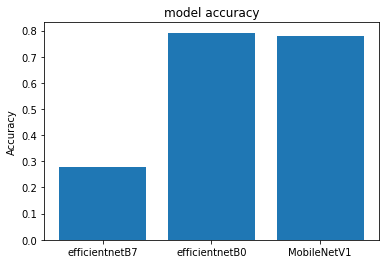

In [49]:
objects = ('efficientnetB7', 'efficientnetB0', 'MobileNetV1')
y_pos = np.arange(len(objects))
performance = [max_acc_b7,max_acc_b0,max_acc_mv1]

plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('model accuracy')

plt.show()

By comparing these three models, we can conclude that the complicated models don't work well for the small dataset. In this case, efficientnetB0 works better than other models.